<a href="https://colab.research.google.com/github/ZionOchayon/Machine-Learning-Deep-Learning-Image-Processing/blob/main/Tree_based_calssifiers_RF_XG_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost


In [ ]:
from keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_tree
from catboost import CatBoostClassifier




In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [ ]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


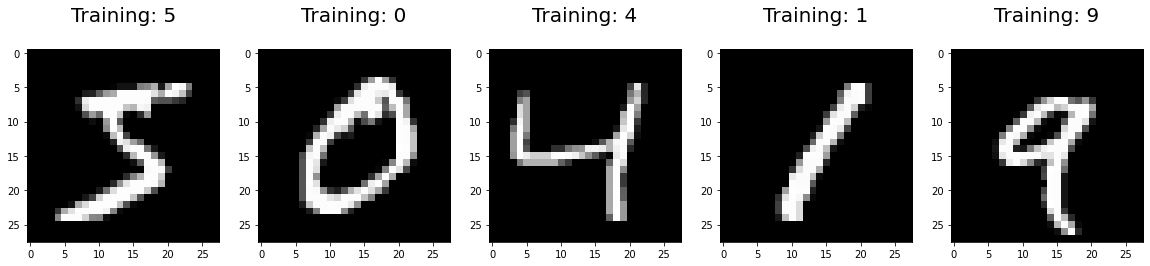

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_X[0:5], train_y[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
flatten_train_X = train_X.reshape(train_X.shape[0],(train_X.shape[1]*train_X.shape[2]))
print(flatten_train_X.shape)

flatten_test_X = test_X.reshape(test_X.shape[0],(test_X.shape[1]*test_X.shape[2]))
print(flatten_test_X.shape)

(60000, 784)
(10000, 784)


In [ ]:
LR_clf=LogisticRegression().fit(flatten_train_X,train_y)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
LR_train_predict=LR_clf.predict(flatten_train_X)
print(classification_report(LR_train_predict,train_y))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5973
           1       0.98      0.96      0.97      6838
           2       0.91      0.93      0.92      5840
           3       0.91      0.92      0.91      6089
           4       0.94      0.94      0.94      5851
           5       0.88      0.91      0.90      5274
           6       0.97      0.95      0.96      5992
           7       0.94      0.95      0.95      6207
           8       0.90      0.89      0.90      5933
           9       0.92      0.91      0.92      6003

    accuracy                           0.93     60000
   macro avg       0.93      0.93      0.93     60000
weighted avg       0.93      0.93      0.93     60000



In [ ]:
LR_test_predict=LR_clf.predict(flatten_test_X)
print(classification_report(LR_test_predict,test_y))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1009
           1       0.98      0.97      0.97      1149
           2       0.90      0.93      0.91       996
           3       0.91      0.90      0.91      1014
           4       0.93      0.93      0.93       974
           5       0.87      0.90      0.89       859
           6       0.95      0.94      0.95       965
           7       0.93      0.93      0.93      1021
           8       0.89      0.87      0.88      1002
           9       0.91      0.91      0.91      1011

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



[Random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [ ]:
RFmodel = RandomForestClassifier(50, max_depth=15, max_features=15)
RFmodel.fit(flatten_train_X, train_y)


RandomForestClassifier(max_depth=15, max_features=15, n_estimators=50)

In [ ]:
RF_train_predict=RFmodel.predict(flatten_train_X)
print(classification_report(RF_train_predict,train_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5926
           1       1.00      0.99      1.00      6777
           2       1.00      1.00      1.00      5940
           3       0.99      1.00      1.00      6099
           4       0.99      1.00      1.00      5821
           5       1.00      1.00      1.00      5417
           6       1.00      1.00      1.00      5917
           7       1.00      0.99      0.99      6286
           8       1.00      1.00      1.00      5838
           9       0.99      0.99      0.99      5979

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [ ]:
RF_test_predict=RFmodel.predict(flatten_test_X)
print(classification_report(RF_test_predict,test_y))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1002
           1       0.99      0.99      0.99      1140
           2       0.97      0.96      0.96      1046
           3       0.96      0.96      0.96      1006
           4       0.96      0.97      0.96       971
           5       0.96      0.97      0.96       880
           6       0.97      0.97      0.97       965
           7       0.95      0.97      0.96      1009
           8       0.94      0.96      0.95       957
           9       0.94      0.93      0.94      1024

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



[XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html)

In [ ]:
#XGBmodel = XGBClassifier()
#XGBmodel.fit(flatten_train_X, train_y)

In [ ]:
#XGB_train_predict=XGBmodel.predict(flatten_train_X)
#print(classification_report(XGB_train_predict,train_y))

In [ ]:
#XGB_test_predict=XGBmodel.predict(flatten_test_X)
#print(classification_report(XGB_test_predict,test_y))

In [ ]:
# Initialize CatBoostClassifier
CatBoostModel = CatBoostClassifier(iterations=20,
                          learning_rate=1,
                          depth=2)
# Fit model
CatBoostModel.fit(flatten_train_X, train_y)
# Get predictions on train
Cat_train_predict = CatBoostModel.predict(flatten_train_X)
print(classification_report(Cat_train_predict,train_y))

# Get predictions on test
Cat_test_predict = CatBoostModel.predict(flatten_test_X)
print(classification_report(Cat_test_predict,test_y))

In [ ]:
Train_accuracies=[]
Test_accuracies=[]
Num_iter=Num_iter=list(range(1,5))+list(range(10,100,5))

for i in Num_iter:

      # Initialize CatBoostClassifier
      CatBoostModel = CatBoostClassifier(iterations=i,
                          learning_rate=1,
                          depth=2)
      # Fit model
      CatBoostModel.fit(flatten_train_X, train_y)
      # Get predictions on train
      Cat_train_predict = CatBoostModel.predict(flatten_train_X)
      Cat_train_report=classification_report(Cat_train_predict,train_y, output_dict=True)
      #print(Cat_train_report)
      Train_accuracies.append(Cat_train_report['accuracy'])

      # Get predictions on test
      Cat_test_predict = CatBoostModel.predict(flatten_test_X)
      Cat_test_report=classification_report(Cat_test_predict,test_y, output_dict=True)
      #print(Cat_test_report)
      Test_accuracies.append(Cat_test_report['accuracy'])




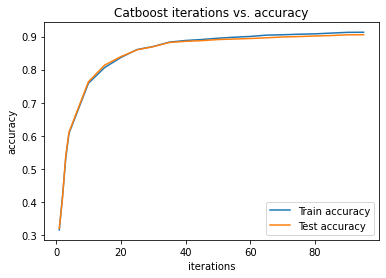

In [ ]:
plt.figure()
plt.plot(Num_iter,Train_accuracies,label = "Train accuracy")
plt.plot(Num_iter,Test_accuracies,label = "Test accuracy")
plt.xlabel("iterations")
plt.ylabel("accuracy")
plt.title("Catboost iterations vs. accuracy")
plt.legend()

In [ ]:
Accuracy_shortist=[40,60,80,95]
for i in Accuracy_shortist:
    print('Accuracy after {} iterations:'.format(i),Test_accuracies[Num_iter.index(i)])


Accuracy after 40 iterations: 0.8856
Accuracy after 60 iterations: 0.8941
Accuracy after 80 iterations: 0.9017
Accuracy after 95 iterations: 0.9055


In [ ]:
Train_accuracies_depth=[]
Test_accuracies_depth=[]
Depths=list(range(4,10))

for i in Depths:

      # Initialize CatBoostClassifier
      CatBoostModel = CatBoostClassifier(iterations=80,
                          learning_rate=1,
                          depth=i)
      # Fit model
      CatBoostModel.fit(flatten_train_X, train_y)
      # Get predictions on train
      Cat_train_predict = CatBoostModel.predict(flatten_train_X)
      Cat_train_report=classification_report(Cat_train_predict,train_y, output_dict=True)
      #print(Cat_train_report)
      Train_accuracies_depth.append(Cat_train_report['accuracy'])

      # Get predictions on test
      Cat_test_predict = CatBoostModel.predict(flatten_test_X)
      Cat_test_report=classification_report(Cat_test_predict,test_y, output_dict=True)
      #print(Cat_test_report)
      Test_accuracies_depth.append(Cat_test_report['accuracy'])



Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 1.7829232	total: 1.46s	remaining: 1m 55s
1:	learn: 1.4181544	total: 2.46s	remaining: 1m 35s
2:	learn: 1.1312061	total: 3.78s	remaining: 1m 37s
3:	learn: 0.9406838	total: 5.14s	remaining: 1m 37s
4:	learn: 0.8267387	total: 6.2s	remaining: 1m 33s
5:	learn: 0.7489621	total: 7.31s	remaining: 1m 30s
6:	learn: 0.6758632	total: 8.18s	remaining: 1m 25s
7:	learn: 0.6075085	total: 9.4s	remaining: 1m 24s
8:	learn: 0.5731557	total: 10.6s	remaining: 1m 23s
9:	learn: 0.5407024	total: 11.5s	remaining: 1m 20s
10:	learn: 0.5197519	total: 12.3s	remaining: 1m 17s
11:	learn: 0.4960029	total: 13.3s	remaining: 1m 15s
12:	learn: 0.4627928	total: 14.4s	remaining: 1m 14s
13:	learn: 0.4388875	total: 15.5s	remaining: 1m 12s
14:	learn: 0.4199607	total: 16.4s	remaining: 1m 10s
15:	learn: 0.4086283	total: 17.3s	remaining: 1m 9s
16:	learn: 0.3892442	total: 18.3s	remaining: 1m 7s
17:	learn: 0.3767596	total: 19.1s	remaining: 1m 5s
18:	learn: 0.3726562	total: 20s	remaining: 1m 4s
19:	learn: 0.3620866	total: 21

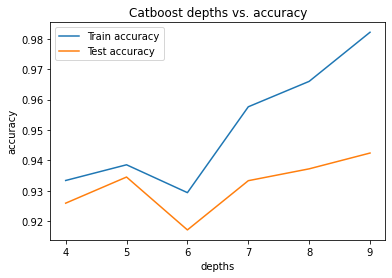

In [ ]:
plt.figure()
plt.plot(Depths,Train_accuracies_depth,label = "Train accuracy")
plt.plot(Depths,Test_accuracies_depth,label = "Test accuracy")
plt.xlabel("depths")
plt.ylabel("accuracy")
plt.title("Catboost depths vs. accuracy")
plt.legend()

In [ ]:
Accuracy_shortist=[5,7,8,9]
for i in Accuracy_shortist:
    print('Train accuracy {:.3f} and test accuracy {:.3f} in depth: {}'.format(Train_accuracies_depth[Depths.index(i)],Test_accuracies_depth[Depths.index(i)], i))

Train accuracy 0.939 and test accuracy 0.934 in depth: 5
Train accuracy 0.958 and test accuracy 0.933 in depth: 7
Train accuracy 0.966 and test accuracy 0.937 in depth: 8
Train accuracy 0.982 and test accuracy 0.942 in depth: 9


In [ ]:
Train_accuracies_learning_rate=[]
Test_accuracies_learning_rate=[]
learning_rates=[0.001, 0.01, 0.1, 1]

for i in learning_rates:

      # Initialize CatBoostClassifier
      CatBoostModel = CatBoostClassifier(iterations=80,
                          learning_rate=i,
                          depth=5)
      # Fit model
      CatBoostModel.fit(flatten_train_X, train_y)
      # Get predictions on train
      Cat_train_predict = CatBoostModel.predict(flatten_train_X)
      Cat_train_report=classification_report(Cat_train_predict,train_y, output_dict=True)
      #print(Cat_train_report)
      Train_accuracies_learning_rate.append(Cat_train_report['accuracy'])

      # Get predictions on test
      Cat_test_predict = CatBoostModel.predict(flatten_test_X)
      Cat_test_report=classification_report(Cat_test_predict,test_y, output_dict=True)
      #print(Cat_test_report)
      Test_accuracies_learning_rate.append(Cat_test_report['accuracy'])

0:	learn: 2.2997149	total: 2.76s	remaining: 3m 37s
1:	learn: 2.2969516	total: 4.53s	remaining: 2m 56s
2:	learn: 2.2942334	total: 6.35s	remaining: 2m 43s
3:	learn: 2.2913524	total: 8.2s	remaining: 2m 35s
4:	learn: 2.2886000	total: 10s	remaining: 2m 30s
5:	learn: 2.2858671	total: 11.8s	remaining: 2m 25s
6:	learn: 2.2831354	total: 13.7s	remaining: 2m 22s
7:	learn: 2.2805357	total: 15.5s	remaining: 2m 19s
8:	learn: 2.2777516	total: 17.3s	remaining: 2m 16s
9:	learn: 2.2749348	total: 19.3s	remaining: 2m 14s
10:	learn: 2.2722502	total: 21.1s	remaining: 2m 12s
11:	learn: 2.2696287	total: 23s	remaining: 2m 10s
12:	learn: 2.2670288	total: 24.8s	remaining: 2m 7s
13:	learn: 2.2643682	total: 26.6s	remaining: 2m 5s
14:	learn: 2.2617263	total: 28.4s	remaining: 2m 3s
15:	learn: 2.2591695	total: 30.2s	remaining: 2m
16:	learn: 2.2565405	total: 32s	remaining: 1m 58s
17:	learn: 2.2537866	total: 33.8s	remaining: 1m 56s
18:	learn: 2.2511550	total: 35.7s	remaining: 1m 54s
19:	learn: 2.2486709	total: 37.4s	re

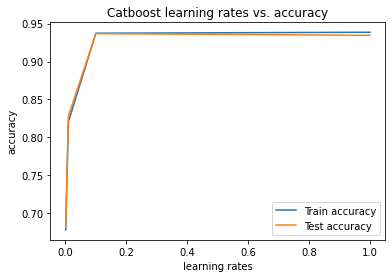

In [ ]:
plt.figure()
plt.plot(learning_rates,Train_accuracies_learning_rate,label = "Train accuracy")
plt.plot(learning_rates,Test_accuracies_learning_rate,label = "Test accuracy")
plt.xlabel("learning rates")
plt.ylabel("accuracy")
plt.title("Catboost learning rates vs. accuracy")
plt.legend()

In [ ]:
for i in learning_rates:
    print('Train accuracy {:.3f} and test accuracy {:.3f} at a learning rate: {}'.format(Train_accuracies_learning_rate[learning_rates.index(i)],Test_accuracies_learning_rate[learning_rates.index(i)], i))

Train accuracy 0.678 and test accuracy 0.682 at a learning rate: 0.001
Train accuracy 0.821 and test accuracy 0.828 at a learning rate: 0.01
Train accuracy 0.937 and test accuracy 0.937 at a learning rate: 0.1
Train accuracy 0.939 and test accuracy 0.934 at a learning rate: 1
